# EECS16A Homework 14

# Question 1: How Much Is Too Much?

## Some Setup Code

You do not need to understand how the following code works.

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

"""Function that constructs a polynomial curve for a set of 
coefficients that multiply the polynomial terms and the x range."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
    
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]
                  
np.random.seed(10)

## Part a) 
Some setup code to create our resistor test data points and plot them.

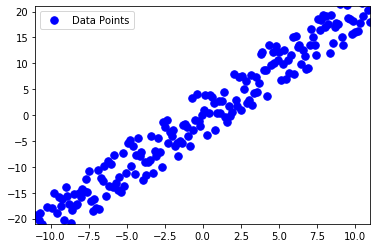

In [2]:
R = 2
x_a = np.linspace(-11,11,200)
y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device. 

/Users/manlai/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Polynomial of Degree 14')

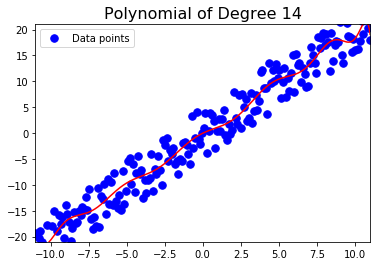

In [13]:
#Play around with degree here to try and fit different degree polynomials
degree=14 # change the degree here
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)


## Part b)

In [9]:
def cost(x, y, start_deg, end_deg):
    """Given a set of x and y points, and a range of polynomial degrees to try, 
    this function calculates polynomial fits to the data for polynomials 
    of different degrees. It returns the "cost", i.e. the magnitude of the error vector for each fit. 
   The output is an array of the cost corresponding to each degree. 
   """
    c = []
    for degree in range(start_deg, end_deg):
        D = data_matrix(x,degree)
        params = leastSquares(D,y)
        error = np.linalg.norm(y-np.dot(D,params))
        c.append(error)
    return c

/Users/manlai/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Cost vs Degree')

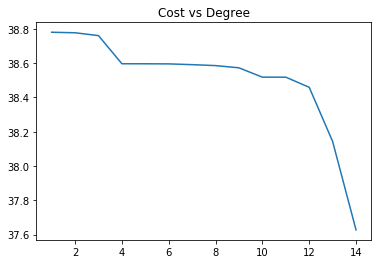

In [10]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs Degree')

## Question 4: Sparse Imaging

This example tries to reconstruct an image using the Orthogonal Matching Pursuit algorithm.

In [15]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
import sys
import imageio
%matplotlib inline

def randMasks(numMasks, numPixels):
    randNormalMat = np.random.normal(0,1,(numMasks,numPixels))
    # make the columns zero mean and normalize
    for k in range(numPixels):
        # make zero mean
        randNormalMat[:,k] = randNormalMat[:,k] - np.mean(randNormalMat[:,k])
        # normalize to unit norm
        randNormalMat[:,k] = randNormalMat[:,k] / np.linalg.norm(randNormalMat[:,k])
    A = randNormalMat.copy()
    Mask = randNormalMat - np.min(randNormalMat)    
    return Mask,A

def simulate():
    # read the image in grayscale
    I = np.load('helper.npy')
    sp = np.sum(I)
    numMeasurements = 6500
    numPixels = I.size
    Mask, A = randMasks(numMeasurements,numPixels)
    full_signal = I.reshape((numPixels,1))
    measurements = np.dot(Mask,full_signal)
    measurements = measurements - np.mean(measurements)
    return measurements, A    

### Part (a)

In [16]:
measurements, A = simulate()

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

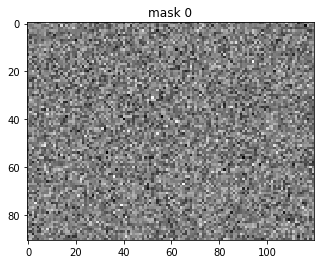

In [17]:
# CHOOSE DIFFERENT MASKS TO PLOT
chosenMaskToDisplay = 0

M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('mask %d'%chosenMaskToDisplay)
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

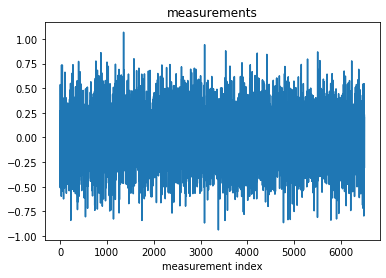

In [18]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [23]:
# OMP algorithm
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
       # Calculate the inner products of r with columns of A
        print('%d - '%i,end="",flush=True)
        simvec = A.T.dot(r)

        # Choose pixel location with highest inner product and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(simvec))
        indices.append(best_index)

        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:,indices]

        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        # COMPLETE THE LINE BELOW
        xhat = np.linalg.lstsq(Atrunc, b)[0]  

        # Find component orthogonal to subspace to use for next measurement
        # COMPLETE THE LINE BELOW
        r = b - Atrunc.dot(xhat)

        # This is for viewing the recovery process
        if i % 10 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

### Part (b)

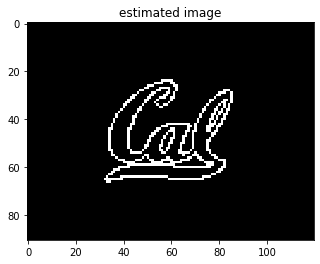

In [24]:
rec = OMP((height,width), sparsity, measurements, A)

### PRACTICE: Part (c)

In [ ]:
# the setting

# file name for the sparse image
fname = 'figures/smiley.png'
# number of measurements to be taken from the sparse image
numMeasurements = 6500
# the sparsity of the image
sparsity = 400

# read the image in black and white
I = imageio.imread(fname, as_gray=True)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [ ]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

In [ ]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

# Question 6: Noise Cancelling Headphones (PRACTICE)

In [25]:
%matplotlib inline

import numpy as np
from matplotlib.pyplot import plot
from scipy.io import wavfile

from audio_support import wavPlayer
from audio_support import loadSounds
from audio_support import recordAmbientNoise

### Part c)
In the following cell, implement the least squares solution to 
$$min_{\vec x} \left| A \vec x - \vec b \right|$$

In [ ]:
def doLeastSquares(A,b):
    # BEGIN
    
    # END
    return x;  

### Part d)
Use your least squares solution to find the gamma that minimizes the effect of noise given:

$$\vec n = \begin{bmatrix} 0.10\\ 0.37\\-0.45\\0.068\\0.036 \end{bmatrix};
	\vec r_A = \begin{bmatrix} 0\\ 0.11\\-0.31\\-0.012\\-0.018 \end{bmatrix};
	\vec r_B = \begin{bmatrix} 0\\ 0.22\\-0.20\\0.080\\0.056 \end{bmatrix};
	\vec r_C = \begin{bmatrix} 0\\ 0.37\\-0.44\\0.065\\0.038 \end{bmatrix}$$


In [ ]:
n1 = 0.10;
n2 = 0.37;
n3 = -0.45;
n4 = 0.068;
n5 = 0.036;

a1 = 0;
a2 = 0.11;
a3 = -0.31;
a4 = -0.012;
a5 = -0.018;

b1 = 0;
b2 = 0.22;
b3 = -0.20;
b4 = 0.080;
b5 = 0.056;

c1 = 0;
c2 = 0.37;
c3 = -0.44;
c4 = 0.065;
c5 = 0.038;

# BEGIN

'...'
gamma = 

# END
print(gamma)

<font color="red">Report the results for your gamma-vector.

### Part e)
First, we'll load the sounds from the included .wav files.

In [ ]:
[music_Fs, music_y, noise1_y, noise1_Fs, noise2_y, noise2_Fs] = loadSounds();

In [ ]:
noise1_y

We can use the following function to listen to our signals throughout this notebook. 

<font color="red">Listen to each of the loaded sounds (`music_y`, `noise1_y`, and `noise2_y`). What do you hear?

In [ ]:
wavPlayer(music_y, music_Fs)

<font color="red">Add the first noise to the signal and listen to the result.

In [ ]:
# BEGIN

# END

<font color="red">Add the second noise to the signal and listen to the result.

In [ ]:
# BEGIN

# END

### Part f)
Next, we will simulate the recording of `noise1` using a simulated microphone array.

In [ ]:
numberOfMicrophones = 3;
R = recordAmbientNoise(noise1_y,noise1_Fs,numberOfMicrophones);


<font color="red">In the cell below, calculate the gamma-vector using the least squares approach (you should calculate `gamma` from `R` and `noise1_y`). 

In [ ]:
# BEGIN
gamma = 
# END

<font color="red">In the cell below, create the noise cancellation signal by multiplying `R` and `gamma`. Add the result to `music_y` (with the right sign) to get `signalFromSpeaker`.

In [ ]:
# BEGIN
'...'
signalFromSpeaker = 
# END

### Part g)
Generate the signal at the listener's ear by adding the speaker signal (`signalFromSpeaker`) to the original noise signal (`noise1_y`).

In [ ]:
# BEGIN
signalAtEar =
# END

Listen to the noisy and noise-cancelled signal.

In [ ]:
wavPlayer(noisyMusic, music_Fs)
wavPlayer(signalAtEar, music_Fs)

<font color="red">What difference can you hear between these signals?

### Part h)
Now, we'll see how well this gamma works for other noise. 

We will run through the simulation again, but this time, we will just use the gamma from before instead of going through a training step.

In [ ]:
noisyMusic_2 = music_y + noise2_y;
R_2 = recordAmbientNoise(noise2_y,noise2_Fs,numberOfMicrophones);
# BEGIN
'...'
signalFromSpeaker_2 = '...' 
signalAtEar_2 = '...'
# END 

wavPlayer(noisyMusic_2, music_Fs)
wavPlayer(signalAtEar_2, music_Fs)

<font color="red"> What do you hear in the noise-cancelled signal?